In [12]:
import cv2
import matplotlib.pyplot as plt
import sys # import requiered module
sys.path.append("..") # append the path of the parent directory


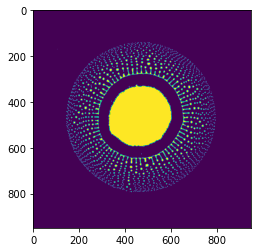

In [24]:
from functions.getOtsu import getOtsu

img,otsu  = getOtsu(frameNumber=50, cropFlag=False)
plt.imshow(otsu)
plt.show()

In [25]:
from functions.diameters import centerAndAllDiameters
center, rc, rb, rs = centerAndAllDiameters(frame=otsu)

Only display the droplet region

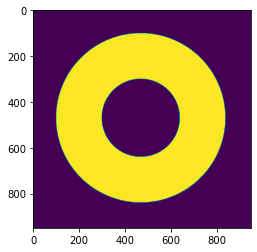

In [15]:
import numpy as np
outer_mask = np.zeros(otsu.shape[:2], dtype="uint8")
outer_mask = cv2.circle(outer_mask, center, rs, 255, -1)

inner_mask = np.zeros(otsu.shape[:2], dtype="uint8")
inner_mask = cv2.circle(inner_mask, center, rb, 255, -1)

mask = np.subtract(outer_mask, inner_mask)
plt.imshow(mask)
plt.show()

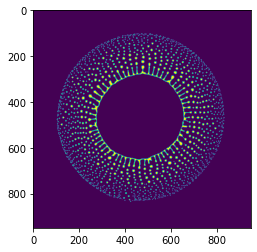

In [16]:
otsu_masked = cv2.bitwise_and(otsu,mask)
plt.imshow(otsu_masked)
plt.show()

Do a quick test

Frameindex = 0


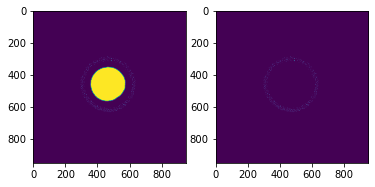

Frameindex = 50


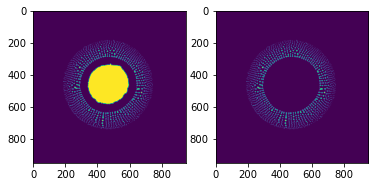

Frameindex = 100


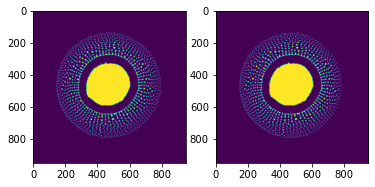

Frameindex = 150


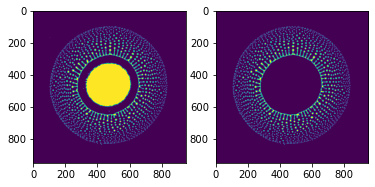

Frameindex = 200


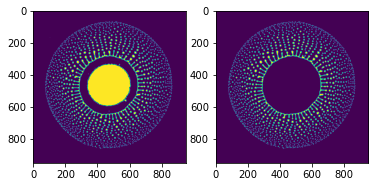

Frameindex = 250


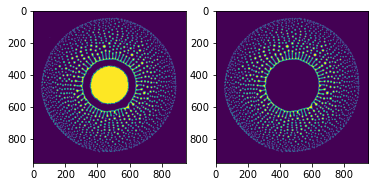

Frameindex = 300


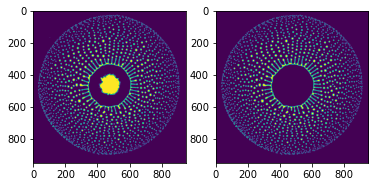

Frameindex = 350


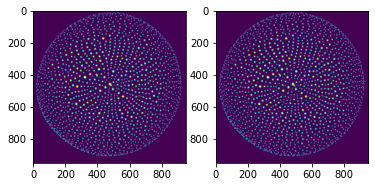

In [23]:
from videoWriterClass import videoWriterClass
myWriter = videoWriterClass()
from functions.removeCore import removeCore

for i in range(0,400,50):
    frame = myWriter.getSingleImage(frameNumber=i)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    th,otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    otsu_masked = removeCore(bw=otsu)

    print(f"Frameindex = {i}")
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(otsu)
    axs[1].imshow(otsu_masked)
    plt.show()